In [4]:
import pandas as pd
import requests
import plotly.graph_objects as go
import numpy as np
import GMX_data as gmx
import plotly.io as pio
pio.renderers.default = "browser"

浮动币 ： ['UNI', 'LINK', 'ETH', 'WBTC']

In [5]:
symbol = gmx.get_token()
actions = gmx.get_actions()
end_day = '2023080100'

In [6]:
glp = gmx.get_glp(end_day)
fee = gmx.get_fee(end_day)
prc = gmx.get_fast_price(symbol,end_day,token_list = ['ETH',"WBTC"])
result,fig,data,indicators = gmx.show_case(glp,fee,prc, [0.286137,0.223263])
fig.show()

apy:  0.29350423436009687
sharpe:  4.5697284239688125
max drawdown:  -0.045247342048037154 end at:  2023-03-11 07:00:00


In [9]:
glp = glp.sort_values(by='time')
glp = glp.set_index('time')
glp

,id,aumInUsdg,glpSupply,__typename,price
time,,,,,
2022-05-14 11:00:00,1652526000,190768443040044490924975121,209872463321478728407042036,HourlyGlpStat,0.908973
2022-05-14 12:00:00,1652529600,191121359032474771241832654,210088311770940233521361788,HourlyGlpStat,0.909719
2022-05-14 13:00:00,1652533200,190383428833786714260267892,210254210199154798944610422,HourlyGlpStat,0.905492
2022-05-14 14:00:00,1652536800,190511404105946544417424833,210172046642721252738058447,HourlyGlpStat,0.906455
2022-05-14 15:00:00,1652540400,190768064635536766992411073,210651499767667291746426704,HourlyGlpStat,0.905610
...,...,...,...,...,...
2023-07-05 02:00:00,1688522400,512639334247749960442739878,498874883339807224468294018,HourlyGlpStat,1.027591
2023-07-05 03:00:00,1688526000,512637352956481437726423715,498810450011915187764728462,HourlyGlpStat,1.027720
2023-07-05 04:00:00,1688529600,512333820976928966245310177,498820899338630306706928940,HourlyGlpStat,1.027090


In [16]:
glp.resample('1.5H').ffill()

,id,aumInUsdg,glpSupply,__typename,price
time,,,,,
2022-05-14 10:30:00,NaN,NaN,NaN,NaN,NaN
2022-05-14 12:00:00,1652529600,191121359032474771241832654,210088311770940233521361788,HourlyGlpStat,0.909719
2022-05-14 13:30:00,1652533200,190383428833786714260267892,210254210199154798944610422,HourlyGlpStat,0.905492
2022-05-14 15:00:00,1652540400,190768064635536766992411073,210651499767667291746426704,HourlyGlpStat,0.905610
2022-05-14 16:30:00,1652544000,193128122694328658300756896,210900349438044951099797720,HourlyGlpStat,0.915732
...,...,...,...,...,...
2023-07-05 00:00:00,1688515200,512176660180154952177384353,498887021386901261245400976,HourlyGlpStat,1.026639
2023-07-05 01:30:00,1688518800,512329062417215503384426187,498878821184611533381520243,HourlyGlpStat,1.026961
2023-07-05 03:00:00,1688526000,512637352956481437726423715,498810450011915187764728462,HourlyGlpStat,1.027720


In [ ]:
# glp price
glp.plot(x = 'time',y = 'price',figsize = (20,10),title = 'GLP price')

In [ ]:
result['hedge_value'] = result['eth_value'] + result['wbtc_value']
result[['glp_value','eth_value','wbtc_value','hedge_value']].corr()

In [ ]:
result.shape

In [60]:
import json

token_list = ['USDC.e', 'USDT', 'UNI', 'LINK', 'DAI', 'ETH', 'WBTC','FRAX']
address_list = [x for x in symbol.index if symbol.loc[x,'data.symbol'] in token_list]
data = pd.DataFrame()
for address in address_list:
    query = f'''{{
    tokenStats(first: 10000, orderBy: timestamp, orderDirection: desc, where: {{ period: "hourly", timestamp_lt: 1800000000, timestamp_gt: 0, token: "{address}" }}) {{
        id
        token
        poolAmount
        poolAmountUsd
        usdgAmount
        reservedAmount
        reservedAmountUsd
        timestamp
        period
    }}
    }}
    '''
    url = 'https://subgraph.satsuma-prod.com/3b2ced13c8d9/gmx/gmx-arbitrum-stats/api'
    headers = {'Content-Type': 'application/json'}
    request_json = {'query': query}
    response = requests.post(url, headers=headers, data=json.dumps(request_json))
    response = response.json()
    if 'errors' in response:
        error_message = data['errors'][0]['message']
        raise Exception(f"GraphQL query failed: {error_message}")
    response = response['data']['tokenStats']
    response = pd.DataFrame(response)
    data = pd.concat([data,response],join = 'outer',axis = 0)


data['time'] = pd.to_datetime(data['timestamp'], unit='s')
data['token'] = data['token'].apply(lambda x: symbol.loc[x]['data.symbol'])
data['poolAmount'] = data['poolAmount'].astype(float) / 10**30
data['poolAmountUsd'] = data['poolAmountUsd'].astype(float) / 10**30
data['usdgAmount'] = data['usdgAmount'].astype(float) / 10**30
data['reservedAmount'] = data['reservedAmount'].astype(float) / 10**30
data['reservedAmountUsd'] = data['reservedAmountUsd'].astype(float) / 10**30
# 计算每个小时的各个币种的比例
# 取eth > 1的数据
cut_window = data[data['token'] == 'ETH'].copy()
data = data[data['time'] >= cut_window['time'].min()]
data['percentage'] = data['poolAmountUsd'] /data['time'].map(data.groupby('time')['poolAmountUsd'].sum())

In [43]:
# 重组成一个表
compo_data = data.pivot(index = 'time',columns = 'token',values = 'percentage')
compo_data.fillna(0,inplace = True)
# 画柱状图
# compo_data.plot(kind = 'bar',stacked = True,figsize = (20,10),title = 'GMX pool composition')

In [6]:
# 获得价格
prc = gmx.get_fast_price(symbol,end_day,['ETH',"WBTC","LINK","UNI"])

In [44]:
for key,value in prc.items():
    temp = value.set_index('time')
    compo_data['value.' + key.lower()] = temp['value.' + key.lower()]
compo_data = compo_data.dropna()

In [56]:
# 合成指数
# 每n个小时调整一次
v0 = 10000
n = 24
count = 0
ratio = compo_data.mean()[['WBTC','ETH','UNI','LINK']]
compo_value = (v0 * ratio).to_list()  / compo_data[['value.wbtc','value.eth','value.uni','value.link']].values[0]
index = (compo_value * compo_data[['value.wbtc','value.eth','value.uni','value.link']]).sum(axis = 1) + v0 * (1-ratio.sum())
compo_data['index'] = index
compo_data

token,DAI,ETH,FRAX,LINK,UNI,USDC.e,USDT,WBTC,value.wbtc,value.eth,value.uni,value.link,index
time,,,,,,,,,,,,,
2023-05-23 11:00:00,0.062581,0.286001,0.014672,0.005514,0.005547,0.426983,0.005004,0.193698,27342.027,1855.329,5.132,6.539,10000.000000
2023-05-23 12:00:00,0.062667,0.285717,0.014656,0.005534,0.005562,0.427357,0.005012,0.193495,27288.589,1852.1,5.128,6.539,9990.620554
2023-05-23 13:00:00,0.063106,0.286936,0.014790,0.000000,0.005599,0.430246,0.004963,0.194358,27239.843,1847.318,5.105,6.526,9978.903934
2023-05-23 14:00:00,0.000000,0.305368,0.015653,0.005918,0.005911,0.455369,0.005253,0.206528,27333.256,1857.309,5.116,6.562,10002.380516
2023-05-23 15:00:00,0.062605,0.286269,0.014773,0.005537,0.005540,0.426847,0.004927,0.193501,27326.94,1857.299,5.123,6.548,10001.801979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 19:00:00,0.067476,0.278361,0.000000,0.006396,0.006475,0.369387,0.015935,0.255970,30619.22,1922.77,5.539,6.428,10374.106926
2023-07-01 20:00:00,0.067635,0.280230,0.000000,0.006508,0.000000,0.372070,0.016040,0.257517,30584.63,1922.5,5.548,6.464,10371.292209
2023-07-01 21:00:00,0.065774,0.272474,0.021291,0.006299,0.006329,0.361840,0.015601,0.250391,30589.52,1922.85,5.539,6.431,10371.842006


In [57]:
glp = gmx.get_glp(end_day)
glp = glp[(glp['time'] >= compo_data.index.min()) & (glp['time'] <= compo_data.index.max())]
glp.sort_values('time',inplace = True)
glp.set_index('time',inplace = True)


<AxesSubplot:title={'center':'GMX index vs GLP'}, xlabel='time'>

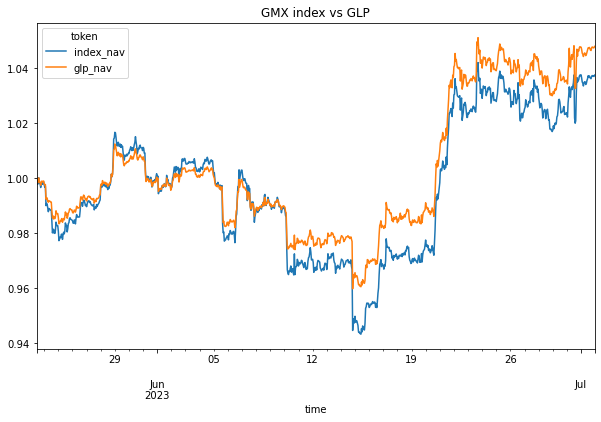

In [58]:
compo_data['index_nav'] = compo_data['index'] / compo_data['index'].iloc[0]
glp['glp_nav'] = glp['price'] / glp['price'].iloc[0]
compo_data['glp_nav'] = glp['glp_nav']
# 画图，白色背景
compo_data[['index_nav','glp_nav']].plot(figsize = (10,6),title = 'GMX index vs GLP')

In [2]:
(1877-1850) / 1877

0.014384656366542355

In [9]:
def get_contract_pnl(now_price):
    return (now_price-6000) / now_price * 1000 * 100 / 6000